### SPE Dataset Preliminary Study

https://www.spe.org/en/industry/data-repository/

Tables:  
- deviation_survey.txt: well trajectories
- well_data.txt: well general data
- production_data.txt: well variables timeseries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [10]:
dfw = pd.read_csv('./SPE/well_data.txt', sep =',', decimal = '.').transpose()
dfp = pd.read_csv('./SPE/production_data.txt', sep =',', decimal = '.')

#### 1. Well Data

In [108]:
dfw.head(5)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,...,Pressure Loss Correlation,Tubing ID (in),Tubing OD (in),Tubing Depth (ft),Casing ID 1 (in),Casing Footage 1 (ft),Casing ID 2 (in),Casing Footage 2 (ft),Casing Depth (ft),Description
OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,74.00%,...,Beggs & Brill,2.441,2.875,6764,4.67,6941,2.992,6307,13248,Well began producing and was later recomplete...
FALCON,2,TX,EAGLE FORD,5700,225,66,0.7,6.30%,27.00%,73.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interior well on a 3-well pad that was shut-i...
HAWK,3,TX,EAGLE FORD,5650,225,67,0.7,6.30%,27.10%,72.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exterior well on a 3-well pad that was shut-i...
EAGLE,4,TX,EAGLE FORD,5000,235,74,0.7,6.30%,27.00%,73.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single unbounded well with modern completion ...


Promoting headers

In [109]:
dfw.columns = dfw.iloc[0]
dfw = dfw[1:]

In [111]:
dfw.info()
dfw.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, OSPREY to GOOSE
Data columns (total 94 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Well Number                                     53 non-null     object
 1   State                                           53 non-null     object
 2   Formation/Reservoir                             53 non-null     object
 3    Initial Pressure Estimate (psi)                53 non-null     object
 4    Reservoir Temperature (deg F)                  53 non-null     object
 5    Net Pay (ft)                                   53 non-null     object
 6    Wellbore Diameter (ft)                         53 non-null     object
 7   Porosity                                        53 non-null     object
 8    Water Saturation                               53 non-null     object
 9    Oil Saturation                                 53 no

Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,...,Pressure Loss Correlation,Tubing ID (in),Tubing OD (in),Tubing Depth (ft),Casing ID 1 (in),Casing Footage 1 (ft),Casing ID 2 (in),Casing Footage 2 (ft),Casing Depth (ft),Description
OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,74.00%,...,Beggs & Brill,2.441,2.875,6764,4.67,6941,2.992,6307,13248,Well began producing and was later recomplete...
FALCON,2,TX,EAGLE FORD,5700,225,66,0.7,6.30%,27.00%,73.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interior well on a 3-well pad that was shut-i...
HAWK,3,TX,EAGLE FORD,5650,225,67,0.7,6.30%,27.10%,72.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exterior well on a 3-well pad that was shut-i...
EAGLE,4,TX,EAGLE FORD,5000,235,74,0.7,6.30%,27.00%,73.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single unbounded well with modern completion ...
KITE,5,TX,EAGLE FORD,5000,238,56,0.7,5.00%,32.10%,67.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Child well with modern completion design offs...


In [146]:
dfw.columns

Index(['Well Number', 'State', 'Formation/Reservoir',
       ' Initial Pressure Estimate (psi) ', ' Reservoir Temperature (deg F) ',
       ' Net Pay (ft) ', ' Wellbore Diameter (ft) ', 'Porosity',
       ' Water Saturation ', ' Oil Saturation ', ' Gas Saturation ',
       ' Gas Specific Gravity ', 'CO2', ' H2S ', 'N2',
       'Condensate Yield (Bc/MMcf)', 'Condensate Gravity (API)',
       ' Dew Point Pressure (psi) ', 'Sep. Temperature (deg F)',
       'Sep. Pressure (psi)', ' Oil Gravity (API) ', ' Initial GOR (scf/bbl) ',
       ' Bubble Point Pressure (psi) ', ' TVD (ft) ', ' Spacing ', '# Stages',
       '# Clusters ', '# Clusters per Stage', 'Pre-Refrac Completion # Stages',
       'Pre-Refrac Completion # Clusters ',
       'Initian Completion # Clusters per Stage', '# of Total Proppant (Lbs)',
       'Total Fluid (Bbls)', ' Lateral Length (ft) ', ' Top Perf (ft) ',
       ' Bottom Perf (ft) ', ' Sandface Temp (deg F) ',
       ' Static Wellhead Temp (deg F) ', ' Configuration 

#### 2. Production Data (as I understand so far, a Lease is a well)

In [9]:
dfp.head(5)
dfp.columns
dfp.info()

,Lease,Time (Days),Choke Size,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,OSPREY,1.0,NaN,0.145,504.39,718.0,NaN,2064.695943,14.695943,2064.695943,14.695943,Casing Pressure,5050.159793
1,OSPREY,2.0,NaN,0.186,564.76,922.0,NaN,1989.695943,14.695943,1989.695943,14.695943,Casing Pressure,5009.599839
2,OSPREY,3.0,NaN,0.231,653.51,753.0,NaN,1864.695943,14.695943,1864.695943,14.695943,Casing Pressure,4795.991972
3,OSPREY,4.0,NaN,0.268,740.71,700.0,NaN,1814.695943,14.695943,1814.695943,14.695943,Casing Pressure,4696.626023
4,OSPREY,5.0,NaN,0.261,678.06,530.0,NaN,1714.695943,14.695943,1714.695943,14.695943,Casing Pressure,4546.990059


Index(['Lease', 'Time (Days)', 'Choke Size', 'Gas Volume (MMscf)',
       'Oil Volume (stb)', 'Water Volume  (stb)',
       'Gas Lift Inj Volume  (MMscf)', 'Casing Pressure  (psi(a))',
       'Tubing Pressure  (psi(a))', 'Active Pressure  (psi(a))',
       'Line Pressure  (psi(a))', 'Pressure Source ',
       'Calculated Sandface Pressure  (psi(a))'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60967 entries, 0 to 60966
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lease                                   60967 non-null  object 
 1   Time (Days)                             60967 non-null  float64
 2   Choke Size                              2288 non-null   float64
 3   Gas Volume (MMscf)                      60748 non-null  float64
 4   Oil Volume (stb)                        52537 non-null  float64
 5   Water Volume  (stb)                     60958 non-null  float64
 6   Gas Lift Inj Volume  (MMscf)            7651 non-null   float64
 7   Casing Pressure  (psi(a))               60967 non-null  float64
 8   Tubing Pressure  (psi(a))               60967 non-null  float64
 9   Active Pressure  (psi(a))               60967 non-null  float64
 10  Line Pressure  (psi(a))                 60967 non-null  fl

Some variables doensn't make sense for a field, but for a given well. Maybe they're a field average for all its wells

In [104]:
dfp['Lease'].unique()


array(['OSPREY', 'HAWK', 'EAGLE', 'KITE', 'SWIFT', 'SPARROW', 'LARK',
       'CARDINAL', 'JAY', 'CROW', 'FALCON', 'LORIKEET', 'MYNAH',
       'PARTRIDGE', 'CASSOWARY', 'ORIOLE', 'WARBLER', 'HARPY',
       'BEE-EATER', 'LOON', 'CUCKOO', 'ROOSTER', 'ARCHAEOPTERYX', 'TERN',
       'STILT', 'AVOCET', 'OSTRICH', 'EMU', 'DUCK', 'HERON', 'STORK',
       'SWAN', 'PARROT', 'CRANE', 'IBIS', 'EGRET', 'PHEASANT', 'MACAW',
       'FLAMINGO', 'PEACOCK', 'PENGUIN', 'ALBATROSS', 'PELICAN', 'OWL',
       'FINCH', 'ROBIN', 'BLUEBIRD', 'CANARY', 'SEAGULL', 'HUMMINGBIRD',
       'PHOENIX', 'TOUCAN', 'GOOSE'], dtype=object)

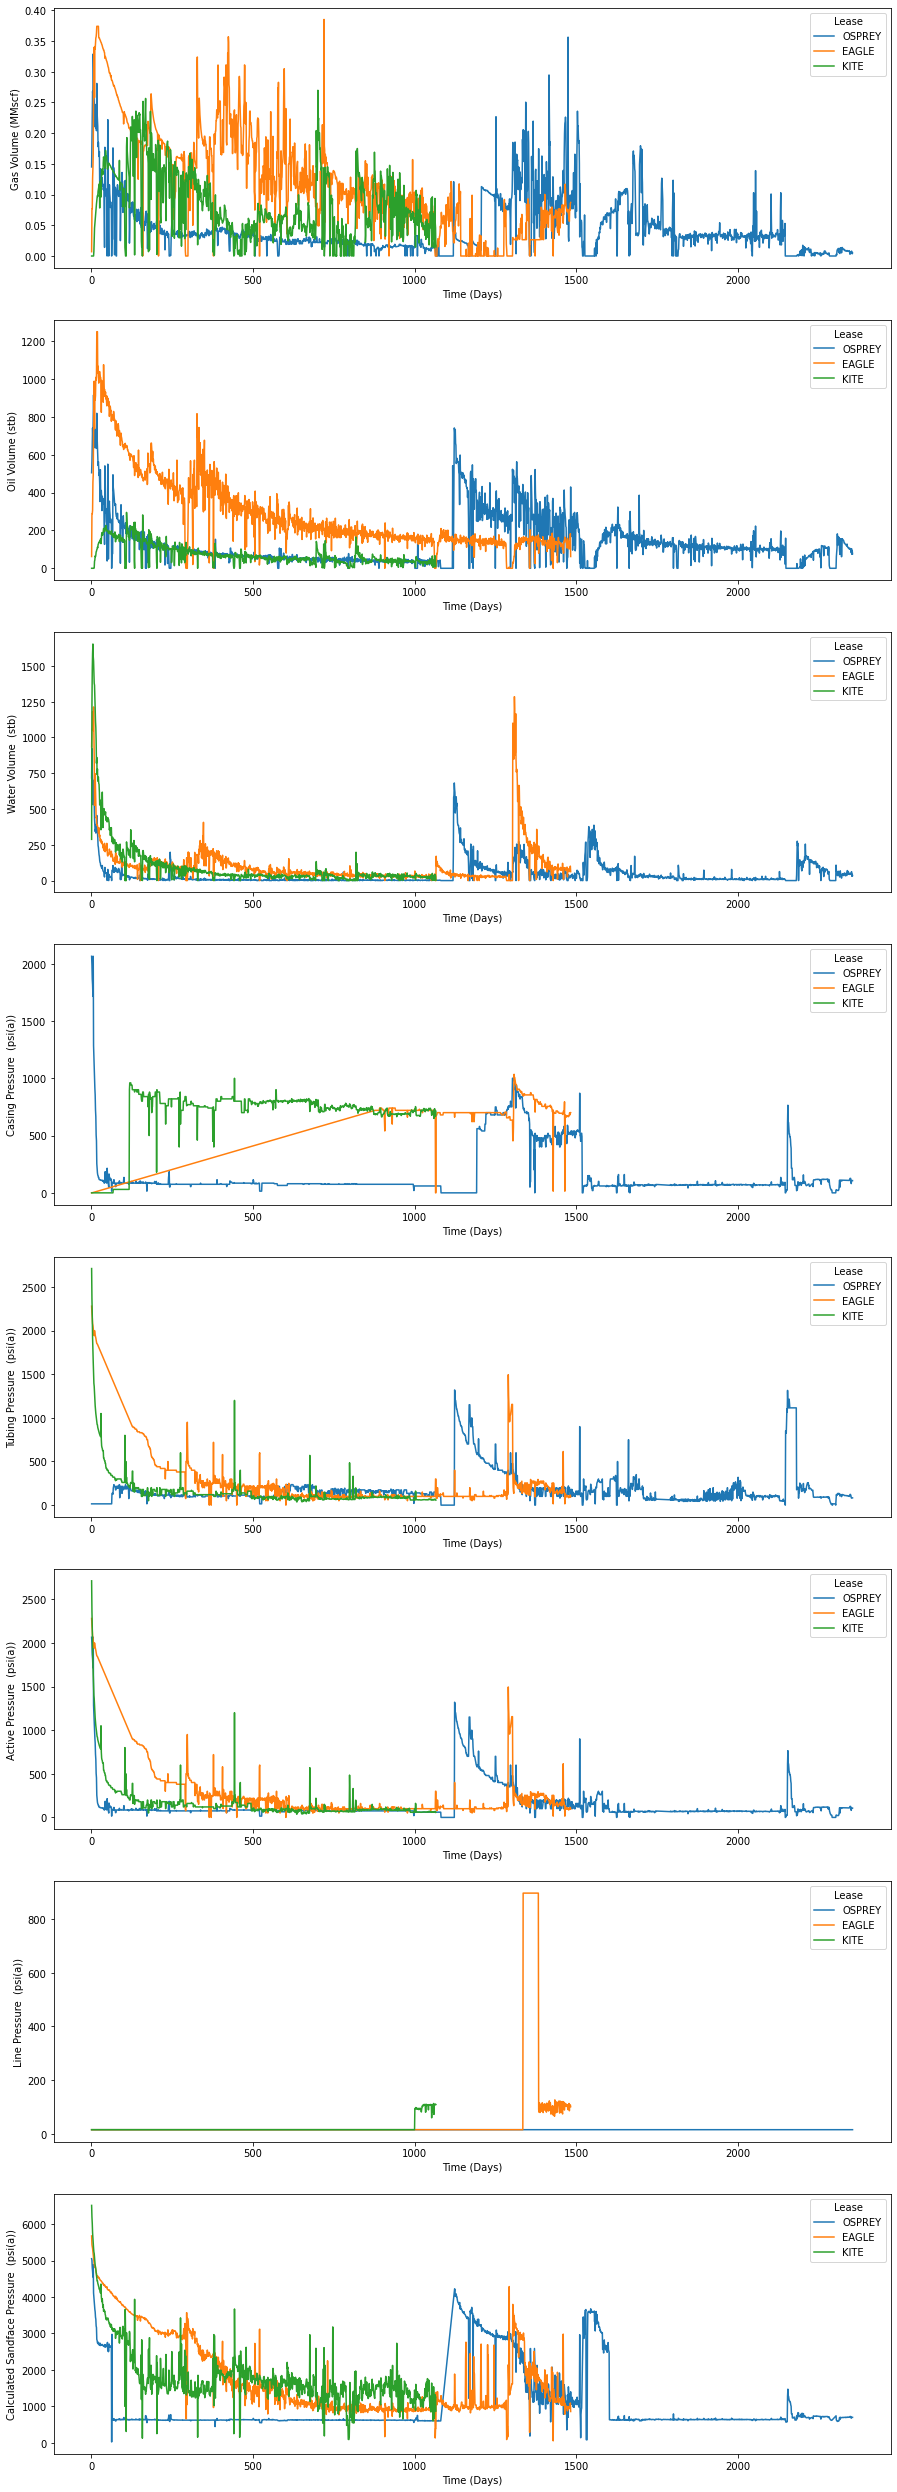

In [99]:
fig, ax = plt.subplots(8,1,figsize=(15,45))

leases = ['OSPREY', 'KITE', 'EAGLE']

sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Gas Volume (MMscf)', hue='Lease', palette='tab10',                        ax=ax[0])
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Oil Volume (stb)', hue='Lease', palette='tab10',                          ax=ax[1])
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Water Volume  (stb)', hue='Lease', palette='tab10',                       ax=ax[2])
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Casing Pressure  (psi(a))', hue='Lease', palette='tab10',                 ax=ax[3])
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Tubing Pressure  (psi(a))', hue='Lease', palette='tab10',                 ax=ax[4])
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Active Pressure  (psi(a))', hue='Lease', palette='tab10',                 ax=ax[5])
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Line Pressure  (psi(a))', hue='Lease', palette='tab10',                   ax=ax[6])
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Calculated Sandface Pressure  (psi(a))', hue='Lease', palette='tab10',    ax=ax[7])

pass;

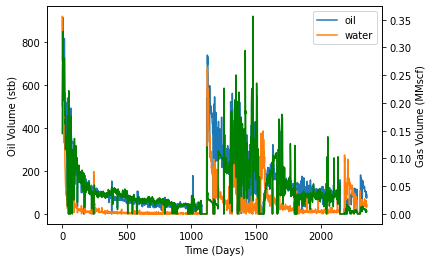

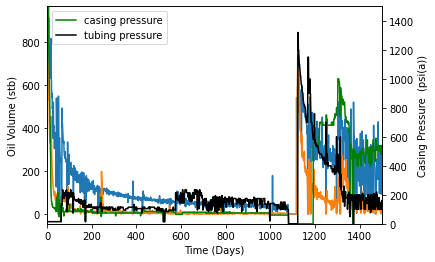

In [145]:
# plt.figure(figsize=(16,8))

leases = ['OSPREY']
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Oil Volume (stb)', palette='tab10', label='oil')
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Water Volume  (stb)', palette='tab10', label='water')
ax2 = plt.twinx()
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Gas Volume (MMscf)', color='g', ax=ax2)

plt.figure()
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Oil Volume (stb)', palette='tab10')
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Water Volume  (stb)', palette='tab10')

ax2 = plt.twinx()
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Casing Pressure  (psi(a))', color='g', ax=ax2, label='casing pressure')
sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Tubing Pressure  (psi(a))', color='k', ax=ax2, label='tubing pressure')
plt.xlim((0,1500))
plt.ylim((0,1500))

# sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Casing Pressure  (psi(a))', hue='Lease', palette='tab10')
# sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Tubing Pressure  (psi(a))', hue='Lease', palette='tab10')
# sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Active Pressure  (psi(a))', hue='Lease', palette='tab10')
# sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Line Pressure  (psi(a))', hue='Lease', palette='tab10')
# sns.lineplot(data=dfp[dfp['Lease'].isin(leases)], x='Time (Days)', y='Calculated Sandface Pressure  (psi(a))', hue='Lease', palette='tab10')
pass;